 BURDEN OF DISEASES ON MEMBER OF SADC COUNTRIES(
Estimating the burden of diseases on 7 SADC countries for 1970 and 2010. Source: Institute for Health Metrics and Evaluation (IHME)

#IMPORT NECESSARY PYTHON LIBRARIES

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

##READ IN THE CSV FILE 

In [30]:
df = pd.read_csv(r"C:\Users\ThatayotlheDinona\Downloads\IHME_GBD_2010_MORTALITY_AGE_SPECIFIC_BY_COUNTRY_1970_2010.csv") ##copy the csv file path and pas it in the argument


## EXPLORATORY ANALYSIS OF THE DATA just to get the feel of the data

In [15]:
df.head() ## viewing the fisrt five rows

,Country Code,Country Name,Year,Age Group,Sex,Number of Deaths,"Death Rate Per 100,000"
0,AFG,Afghanistan,1970,0-6 days,Male,"19,241","318,292.90"
1,AFG,Afghanistan,1970,0-6 days,Female,"12,600","219,544.20"
2,AFG,Afghanistan,1970,0-6 days,Both,"31,840","270,200.70"
3,AFG,Afghanistan,1970,7-27 days,Male,"15,939","92,701.00"
4,AFG,Afghanistan,1970,7-27 days,Female,"11,287","68,594.50"


In [21]:
df.dtypes ## determine the type of data i am working with

Country Code              object
Country Name              object
Year                       int64
Age Group                 object
Sex                       object
Number of Deaths          object
Death Rate Per 100,000    object
dtype: object

## DATA TRANSFORMATION change the data type of the last two columns into float 

In [36]:
df['Number of Deaths'] = df['Number of Deaths'].astype(str) ##firstly the column needs to be converted to a str datatype
                                                      
df['Number of Deaths'] = df['Number of Deaths'].str.replace(';', '') ## after converting the datatype replace semicolon with nothing


In [40]:
df.dtypes ##check the datatype that has been converted to a str

Country Code               object
Country Name               object
Year                        int64
Age Group                  object
Sex                        object
Number of Deaths           object
Death Rate Per 100,000    float64
dtype: object

In [42]:
df['Number of Deaths'] = df['Number of Deaths'].astype(float) ## convert the column to a float datatype

In [46]:
df.dtypes ## the column has been converted successfull

Country Code               object
Country Name               object
Year                        int64
Age Group                  object
Sex                        object
Number of Deaths          float64
Death Rate Per 100,000    float64
dtype: object

## DATA TRANSFORMATION drop value 'Both' on sex column

In [56]:
df = df[df['Sex'] != 'Both'] ## the dataframe will exclude anything that is not equalls to Both(sex)


In [23]:
df.shape ##determine the size of the dataframe/dataset

(58905, 7)

In [29]:
df.isna().sum() ## checking for null values

Country Code              0
Country Name              0
Year                      0
Age Group                 0
Sex                       0
Number of Deaths          0
Death Rate Per 100,000    0
dtype: int64

## DATA MANIPULATION

In [68]:
df[['Number of Deaths','Sex']].groupby('Sex').count()## a simple count on sex 

,Number of Deaths
Sex,
Female,19635
Male,19635


## FILTERING FOR SADC COUNTRIES ONLY (Botswana, SouthAfrica,Namibia, Zimbabwe, Lesotho

In [139]:
SADC_countries = ['Botswana', 'South Africa', 'Namibia', 'Zimbabwe', 'Lesotho','Zambia','Eswatini','Mozambique'] ## list of SADC countries to pass to the filter function

filtered_df = df[df['Country Name'].isin(SADC_countries)] ## filtering the dataframe/dataset to only include SADC countries


## DATA VISUALISATION:   WHAT IS THE NUMBER OF DEATHS BY COUNTRIES(SADC)

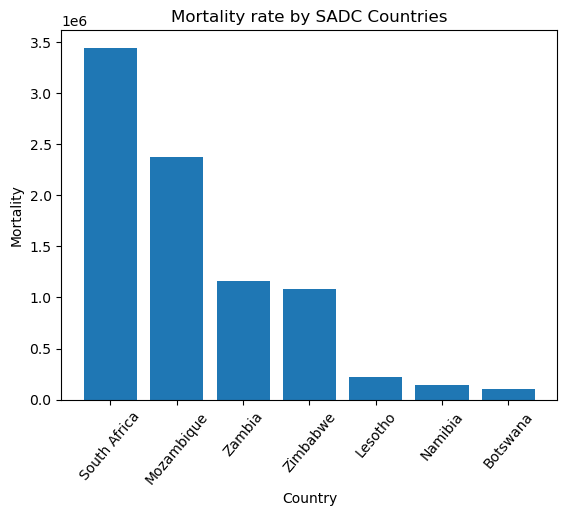

In [155]:
country_deaths = filtered_df.groupby('Country Name')['Number of Deaths'].sum().sort_values(ascending=False) ### Group by 'Country Name' and sum 'Number of Deaths', then sort by the number of deaths in descending order 

## Plotting
plt.bar(country_deaths.index, country_deaths.values)
plt.xlabel('Country')
plt.ylabel('Mortality')
plt.xticks(rotation=50)
plt.title('Mortality rate by SADC Countries')

plt.show()

## TRENDS OVER TIME :How the burden of disease has shifted over the year

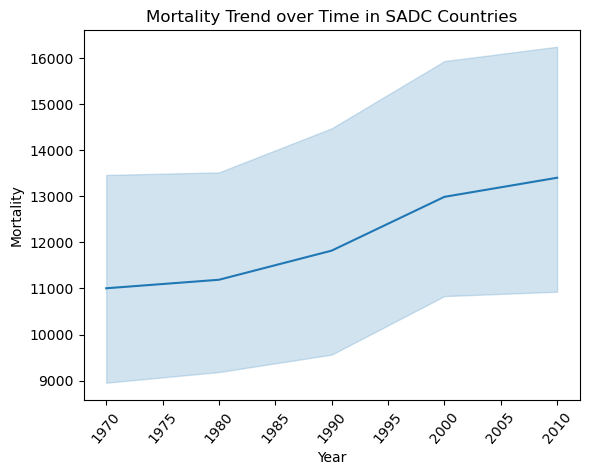

In [167]:

# Plotting with Seaborn
sns.lineplot(data=df, x='Year', y='Number of Deaths')
plt.xlabel('Year')
plt.ylabel('Mortality')
plt.title('Mortality Trend over Time in SADC Countries')
plt.xticks(rotation=50)

plt.show()


## DRILLING DOWN TO BOTSWANA TO SEE HOW HAS THE DISEASE PROGRESSED OVER TIME

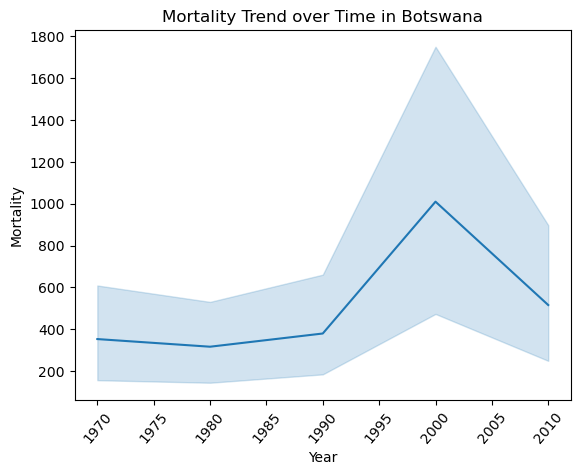

In [169]:
# Filter for Botswana
botswana_df = df[df['Country Name'] == 'Botswana']

# Plotting with Seaborn
sns.lineplot(data=botswana_df, x='Year', y='Number of Deaths')
plt.xlabel('Year')
plt.ylabel('Mortality')
plt.title('Mortality Trend over Time in Botswana')
plt.xticks(rotation=50)

plt.show()


## COMPARING BOTSWANA AND SOUTH AFRICA: HOW HAS THE DISEASE PROGRESSED

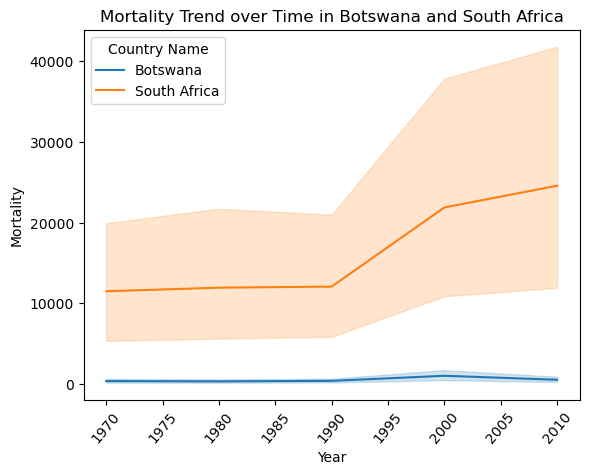

In [171]:
filtered_df = df[df['Country Name'].isin(['Botswana', 'South Africa'])]

# Plotting with Seaborn
sns.lineplot(data=filtered_df, x='Year', y='Number of Deaths', hue='Country Name')
plt.xlabel('Year')
plt.ylabel('Mortality')
plt.title('Mortality Trend over Time in Botswana and South Africa')
plt.xticks(rotation=50)

plt.show()


## WHAT IS THE DEATH RATE BY SEX FOR BOTSWANA

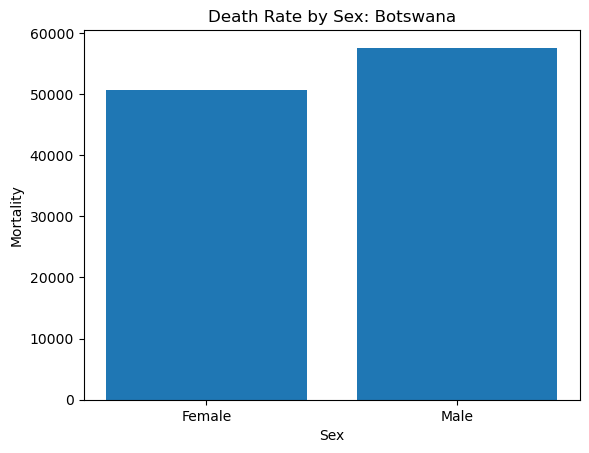

In [185]:

## Filter the DataFrame/Dataset for Botswana
Botswana1 = df[df['Country Name'] == 'Botswana']

## Group by Sex and sum the Number of Deaths
Botswana_Sex = Botswana1.groupby('Sex')['Number of Deaths'].sum()

## Plotting 
plt.bar(Botswana_Sex.index, Botswana_Sex.values)
plt.xlabel('Sex')
plt.ylabel('Mortality')
plt.title('Death Rate by Sex: Botswana')

plt.show()





## WHAT IS THE DEATH RATE BY SEX:SADC COUNTRIES

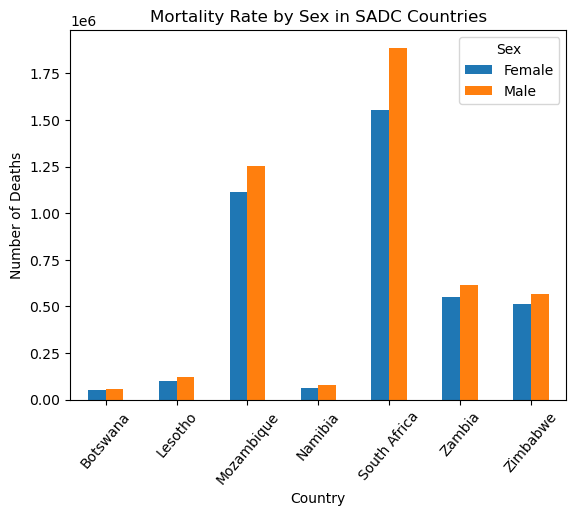

In [199]:
## List of SADC countries
sadc_countries = ['Botswana', 'South Africa', 'Namibia', 'Zimbabwe', 'Lesotho', 'Zambia', 'Eswatini', 'Mozambique']

## Filter the DataFrame for SADC countries
sadc_df = df[df['Country Name'].isin(sadc_countries)]

## Group by Country and Sex and sum the Number of Deaths
sadc_sex = sadc_df.groupby(['Country Name', 'Sex'])['Number of Deaths'].sum().unstack()

## Plotting
sadc_sex.plot(kind='bar')
plt.xlabel('Country')
plt.ylabel('Number of Deaths')
plt.title('Mortality Rate by Sex in SADC Countries')
plt.legend(title='Sex')
plt.xticks(rotation= 50)

plt.show()


## WHAT IS THE MORTALITY RATE BY AGE GROUP AMONG SADC COUNTRIES

In [203]:
df = df[df['Age Group'] != 'All ages']  ## drop All ages from the Age Group column

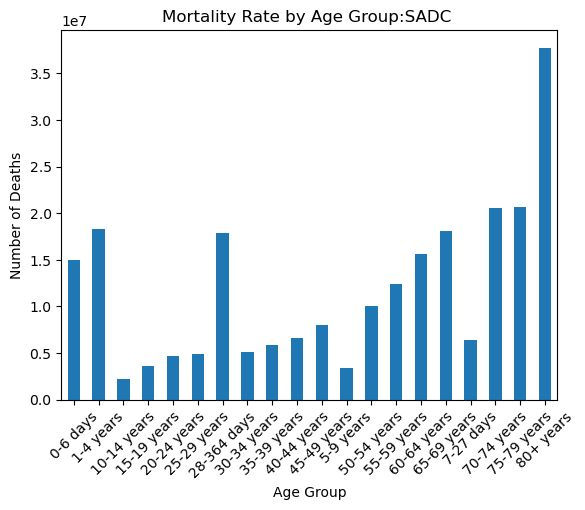

In [207]:


# Group by Age Group and sum the Number of Deaths
age_group_deaths = df.groupby('Age Group')['Number of Deaths'].sum()

# Plotting
age_group_deaths.plot(kind='bar')
plt.xlabel('Age Group')
plt.ylabel('Number of Deaths')
plt.title('Mortality Rate by Age Group:SADC ')
plt.xticks(rotation=45)
plt.show()


## DRILLING DOWN TO BOTSWANA: WHAT IS THE MORTALITY RATE BY AGE GROUP IN BOTSWANA

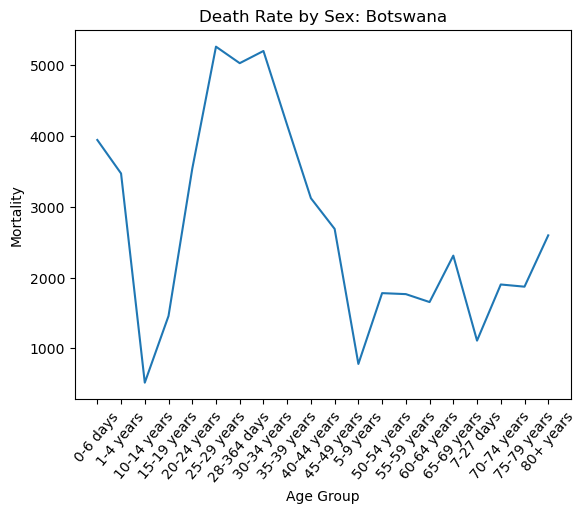

In [219]:
## Filter the DataFrame/Dataset for Botswana
Botswana1 = df[df['Country Name'] == 'Botswana']

## Group by Sex and sum the Number of Deaths
Botswana_Sex = Botswana1.groupby('Age Group')['Number of Deaths'].sum()

## Plotting 
plt.plot(Botswana_Sex.index, Botswana_Sex.values)
plt.xlabel('Age Group')
plt.ylabel('Mortality')
plt.title('Death Rate by Sex: Botswana')
plt.xticks(rotation=50)

plt.show()

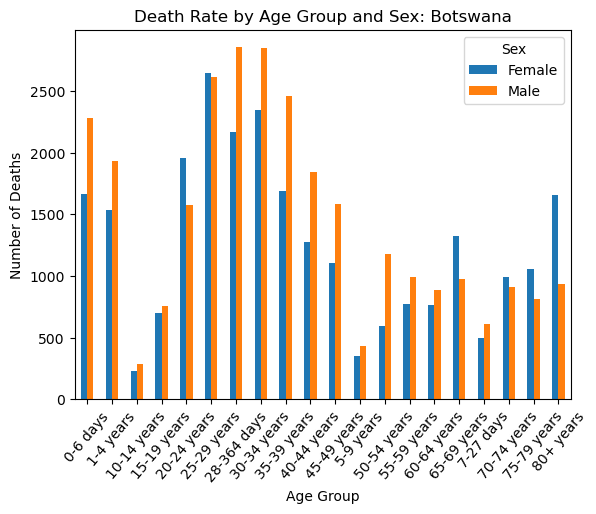

In [227]:
# Group by Age Group and Sex, then sum the Number of Deaths
Botswana_Age_Sex = Botswana1.groupby(['Age Group', 'Sex'])['Number of Deaths'].sum().unstack()

# Plotting
Botswana_Age_Sex.plot(kind='bar')
plt.xlabel('Age Group')
plt.ylabel('Number of Deaths')
plt.title('Death Rate by Age Group and Sex: Botswana')
plt.xticks(rotation=50)

plt.show()


### WHAT ARE POTENTIAL OUTLIERS OF MORTALITY: BOTSWANA

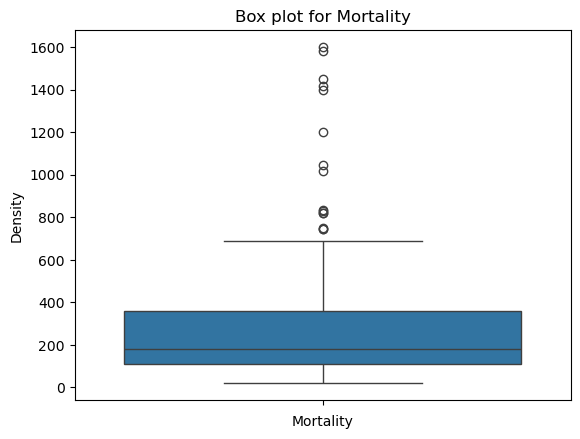

In [243]:
Botswana1 = df[df['Country Name'] == 'Botswana']

## Group by Sex and sum the Number of Deaths
Botswana_Sex = Botswana1.groupby('Number of Deaths').sum()

## Plotting 
sns.boxplot(Botswana_Sex.index)
plt.xlabel('Mortality')
plt.ylabel('Density')
plt.title('Box plot for Mortality')
plt.show()